# Problem Statement:
Loan Repayment Assessment in Banking. we are required to build and train a model that identifies a customer will repay or 
default  the loan from the Loan  dataset.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
train_data = pd.read_csv('train_loan_data.csv')
test_data = pd.read_csv('test_loan_data.csv')

In [3]:
train_data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [4]:
test_data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


In [5]:
# Descriptionof the values
print("\nDiscription Values:")
print(train_data.describe())


Discription Values:
         annual_inc  fico_range_high  fico_range_low      int_rate  \
count  8.000000e+04     80000.000000    80000.000000  80000.000000   
mean   7.604614e+04       699.987975      695.987813     13.232898   
std    6.902006e+04        31.734840       31.734075      4.771705   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.600000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.740000   
75%    9.000000e+04       714.000000      710.000000     15.990000   
max    7.141778e+06       850.000000      845.000000     30.990000   

          loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  80000.000000    76052.000000  77229.000000  7.605200e+04  80000.000000   
mean   14403.867813        3.633790      1.674759  1.415864e+05     11.605675   
std     8703.826298        2.262505      2.005104  1.593714e+05      5.483362   
min      750.000000     

In [6]:
# Descriptionof the values
print("\nDiscription Values:")
print(test_data.describe())


Discription Values:
         annual_inc  fico_range_high  fico_range_low      int_rate  \
count  2.000000e+04     20000.000000    20000.000000  20000.000000   
mean   7.649765e+04       700.204400      696.204250     13.259451   
std    8.568097e+04        31.768558       31.767853      4.772028   
min    0.000000e+00       664.000000      660.000000      5.310000   
25%    4.500000e+04       674.000000      670.000000      9.750000   
50%    6.500000e+04       694.000000      690.000000     12.790000   
75%    9.000000e+04       714.000000      710.000000     16.020000   
max    9.522972e+06       850.000000      845.000000     30.990000   

         loan_amnt  num_actv_bc_tl      mort_acc   tot_cur_bal      open_acc  \
count  20000.00000    18989.000000  19296.000000  1.898900e+04  20000.000000   
mean   14426.67125        3.617410      1.669310  1.412009e+05     11.593450   
std     8811.38736        2.220795      1.981554  1.558483e+05      5.507847   
min     1000.00000        0.

In [7]:
# Exploratory Data Analysis (EDA)
print("Data Information:")
print(train_data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  t

In [8]:
# Description of the values
print("\nDiscription Values:")
print(train_data.describe(include = ['object']))


Discription Values:
       addr_state earliest_cr_line emp_length emp_title  grade home_ownership  \
count       80000            80000      75412     74982  80000          80000   
unique         51              640         11     36661      7              6   
top            CA           Sep-03  10+ years   Teacher      B       MORTGAGE   
freq        11744              547      26278      1278  23502          39628   

       application_type initial_list_status             purpose sub_grade  \
count             80000               80000               80000     80000   
unique                2                   2                  14        35   
top          Individual                   w  debt_consolidation        C1   
freq              78446               46745               46418      4982   

              term               title verification_status loan_status  
count        80000               79030               80000       80000  
unique           2                5348   

In [9]:
# Description of the values
print("\nDiscription Values:")
print(test_data.describe(include = ['object']))


Discription Values:
       addr_state earliest_cr_line emp_length emp_title  grade home_ownership  \
count       20000            20000      18742     18622  20000          20000   
unique         50              568         11     11180      7              4   
top            CA         Oct-2001  10+ years   Teacher      B       MORTGAGE   
freq         2865              160       6579       357   5756           9900   

       application_type initial_list_status             purpose sub_grade  \
count             20000               20000               20000     20000   
unique                2                   2                  14        35   
top          Individual                   w  debt_consolidation        C1   
freq              19610               11582               11611      1294   

              term               title verification_status  
count        20000               19753               20000  
unique           2                1623                   3  
top 

In [10]:
# Information of the values
print("\n All the information Values:")
print(train_data.info())


 All the information Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  fl

In [11]:
# Checking for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64


# Handling the missing values


In [12]:
# Display the specified columns
specified_columns = ['emp_length', 'emp_title']
print(train_data[specified_columns])

      emp_length                       emp_title
0      10+ years                          Deputy
1      10+ years  Department of Veterans Affairs
2      10+ years                Marble polishing
3      10+ years                         printer
4      10+ years                   Southern Mgmt
...          ...                             ...
79995  10+ years            Sports Group Manager
79996  10+ years                    Web Designer
79997   < 1 year                 Program Officer
79998    3 years            Sr. Business Analyst
79999    2 years               Managing Director

[80000 rows x 2 columns]


In [13]:
# emp_length: This column represents employment length in years.
#Since it's a categorical variable with ordered levels it's suitable to fill missing values with the mode.

train_data['emp_length'].fillna(train_data['emp_length'].mode()[0], inplace=True)

In [14]:
# Fill missing values in 'emp_title' with 'Unknown'
"""emp_title: This column represents job titles. Since it's a categorical variable with numerous unique values, 
filling missing values with the mode (most frequent job title) may not be appropriate.
Instead, we can fill missing values with a new category like "Unknown" to indicate missing job titles."""

train_data['emp_title'].fillna('Unknown', inplace=True)

In [15]:
# Display the specified columns
specified_columns = ['num_actv_bc_tl', 'mort_acc', 'tot_cur_bal']
print(train_data[specified_columns])

       num_actv_bc_tl  mort_acc  tot_cur_bal
0                 1.0       1.0     319479.0
1                 4.0       0.0      19944.0
2                 4.0       2.0      23199.0
3                 4.0       1.0      72651.0
4                14.0       7.0      64631.0
...               ...       ...          ...
79995             5.0       4.0     220521.0
79996             2.0       2.0     245781.0
79997             1.0       3.0     382274.0
79998             3.0       3.0     201841.0
79999             4.0       2.0    3046776.0

[80000 rows x 3 columns]


In [16]:
# Fill missing values in 'num_actv_bc_tl' with its median
"""For 'num_actv_bc_tl', it represents the number of currently active bankcard accounts. 
Since this is a count of accounts, it's reasonable to fill missing values with the median value,
which is the value that appears in the middle of the sorted list of values."""


median_num_actv_bc_tl = train_data['num_actv_bc_tl'].median()
train_data['num_actv_bc_tl'].fillna(median_num_actv_bc_tl, inplace=True)

In [17]:
# Fill missing values in 'mort_acc' with its median
""" For 'mort_acc', it represents the number of mortgage accounts.  this is a count,so filling missing values with the 
median would be suitable."""

median_mort_acc = train_data['mort_acc'].median()
train_data['mort_acc'].fillna(median_mort_acc, inplace=True)


In [18]:
# Fill missing values in 'tot_cur_bal' with its median
"""For 'tot_cur_bal', it represents the total current balance of all accounts.
Given that this is a monetary value, filling missing values with the median would maintain the central tendency
of the data without being overly influenced by extreme values."""

median_tot_cur_bal = train_data['tot_cur_bal'].median()
train_data['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)

In [19]:
# Display the specified columns
specified_columns = ['pub_rec_bankruptcies', 'revol_util', 'title']
print(train_data[specified_columns])

       pub_rec_bankruptcies  revol_util                    title
0                       0.0        93.6       Debt consolidation
1                       0.0        60.3              Credit Loan
2                       0.0        88.5       Debt consolidation
3                       0.0        69.0       Debt consolidation
4                       0.0        90.0      Debt Connsolidation
...                     ...         ...                      ...
79995                   0.0        93.5       Debt consolidation
79996                   0.0        56.9       Debt consolidation
79997                   0.0        25.6       Debt consolidation
79998                   1.0        49.4  Credit card refinancing
79999                   0.0        96.7       Debt consolidation

[80000 rows x 3 columns]


In [20]:
# Fill missing values in 'pub_rec_bankruptcies' with 0
""" pub_rec_bankruptcies: Filling missing values with 0 is suitable because it indicates that there were no bankruptcies reported, 
which is a common scenario."""
train_data['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [21]:
# Fill missing values in 'revol_util' with its median
""" revol_util: Filling missing values with the median ensures that the central tendency of the data is maintained without being overly influenced by extreme values.
This is important for a continuous numerical variable like revolving line utilization rate."""
median_revol_util = train_data['revol_util'].median()
train_data['revol_util'].fillna(median_revol_util, inplace=True)

In [22]:
# Fill missing values in 'title' with 'Unknown'
"""title: Filling missing values with 'Unknown' creates a new category to represent missing titles.
This preserves the information about missing titles while allowing for analysis or modeling. Additionally, 
it's a common practice to handle missing categorical values by creating a separate category.
"""
train_data['title'].fillna('Unknown', inplace=True)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  object 
 4   emp_title             80000 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

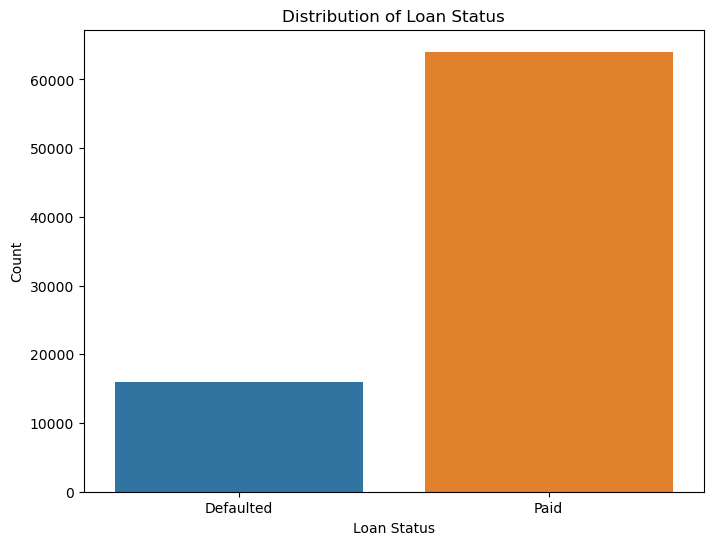

In [24]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

#  Target Variable Distribution
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=train_data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [25]:
#  Univariate Analysis
numerical_features = ['annual_inc', 'fico_range_high', 'fico_range_low', 'loan_amnt', 'revol_bal', 'total_acc', 'revol_util']
categorical_features = ['addr_state', 'emp_length', 'home_ownership', 'purpose', 'verification_status']

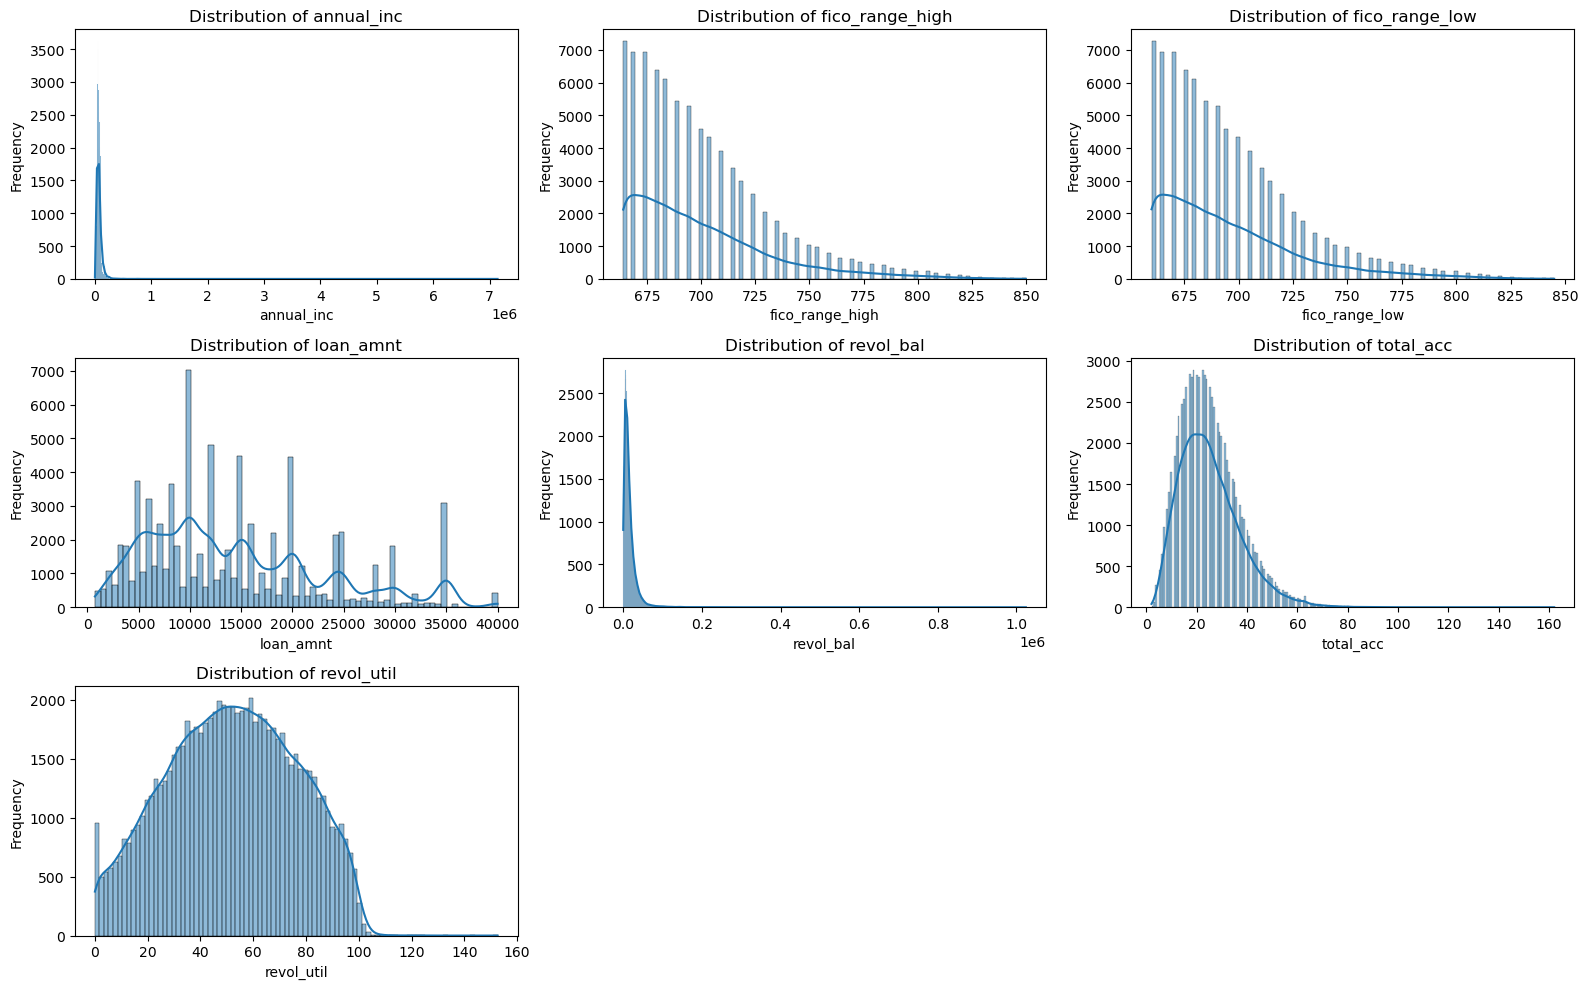

In [26]:
# Numerical Features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

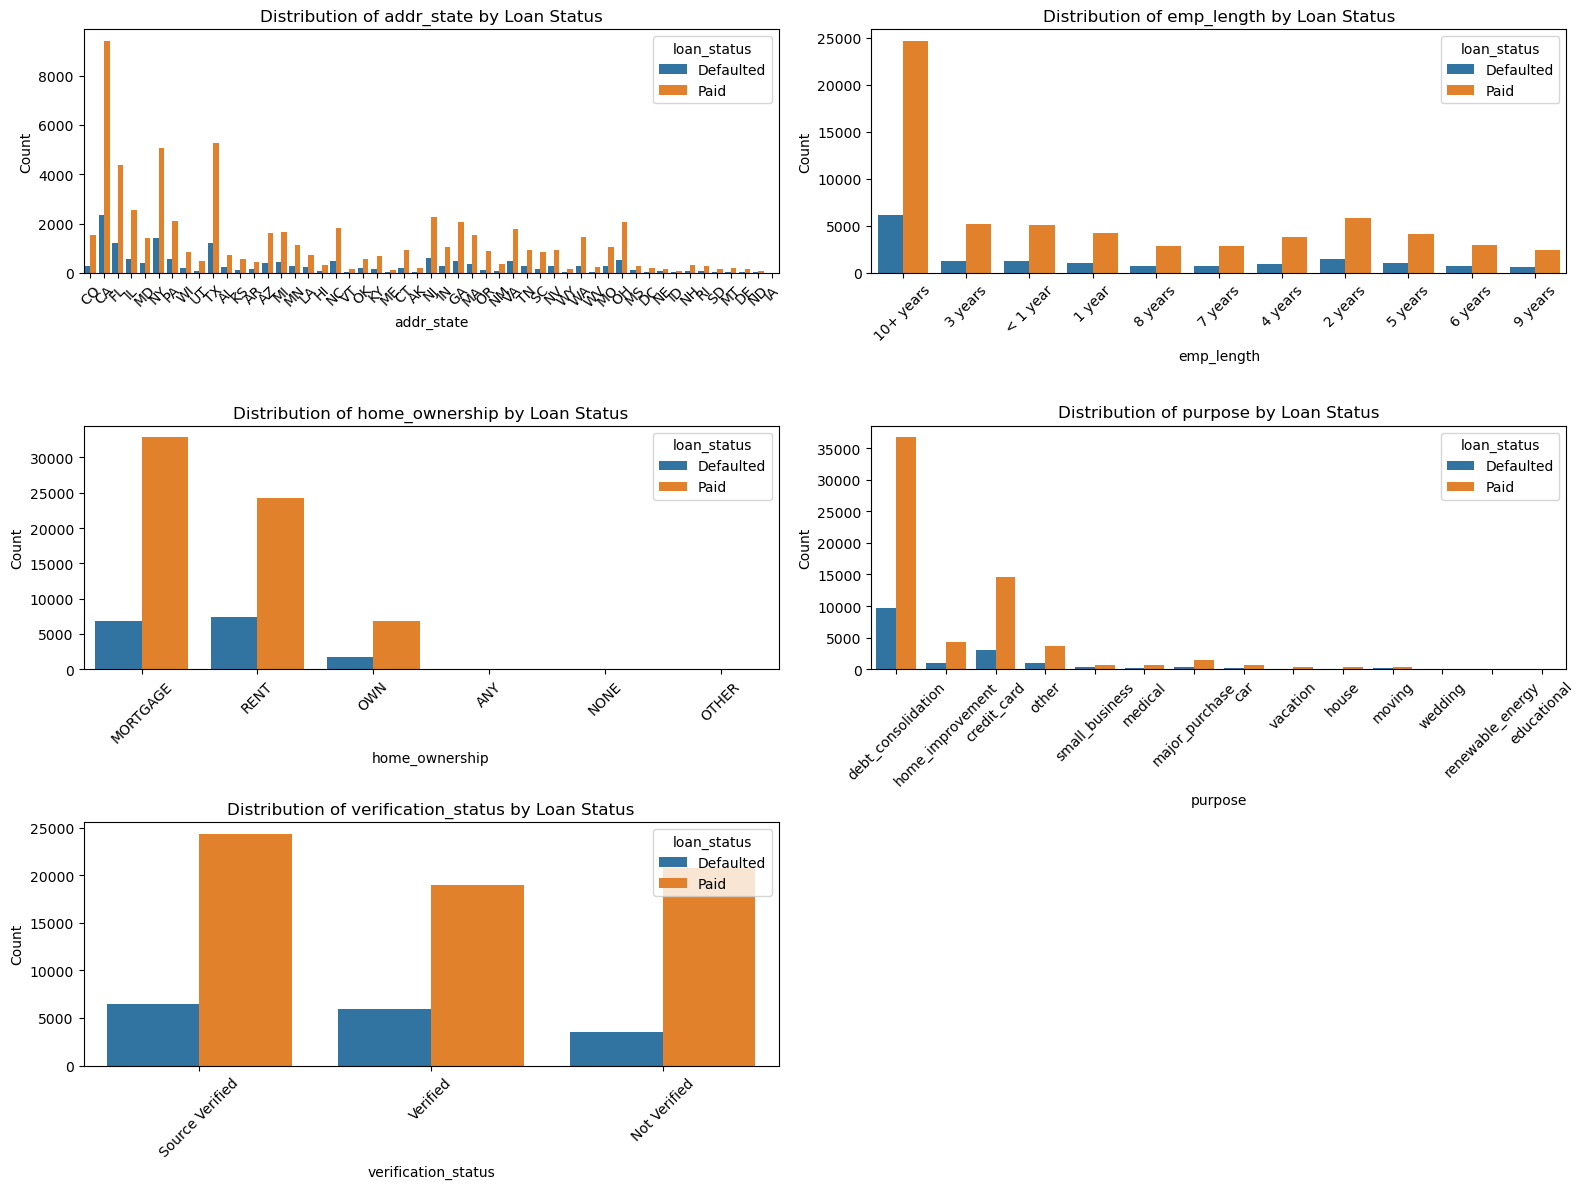

In [27]:
# Categorical Features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=train_data, hue='loan_status')
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

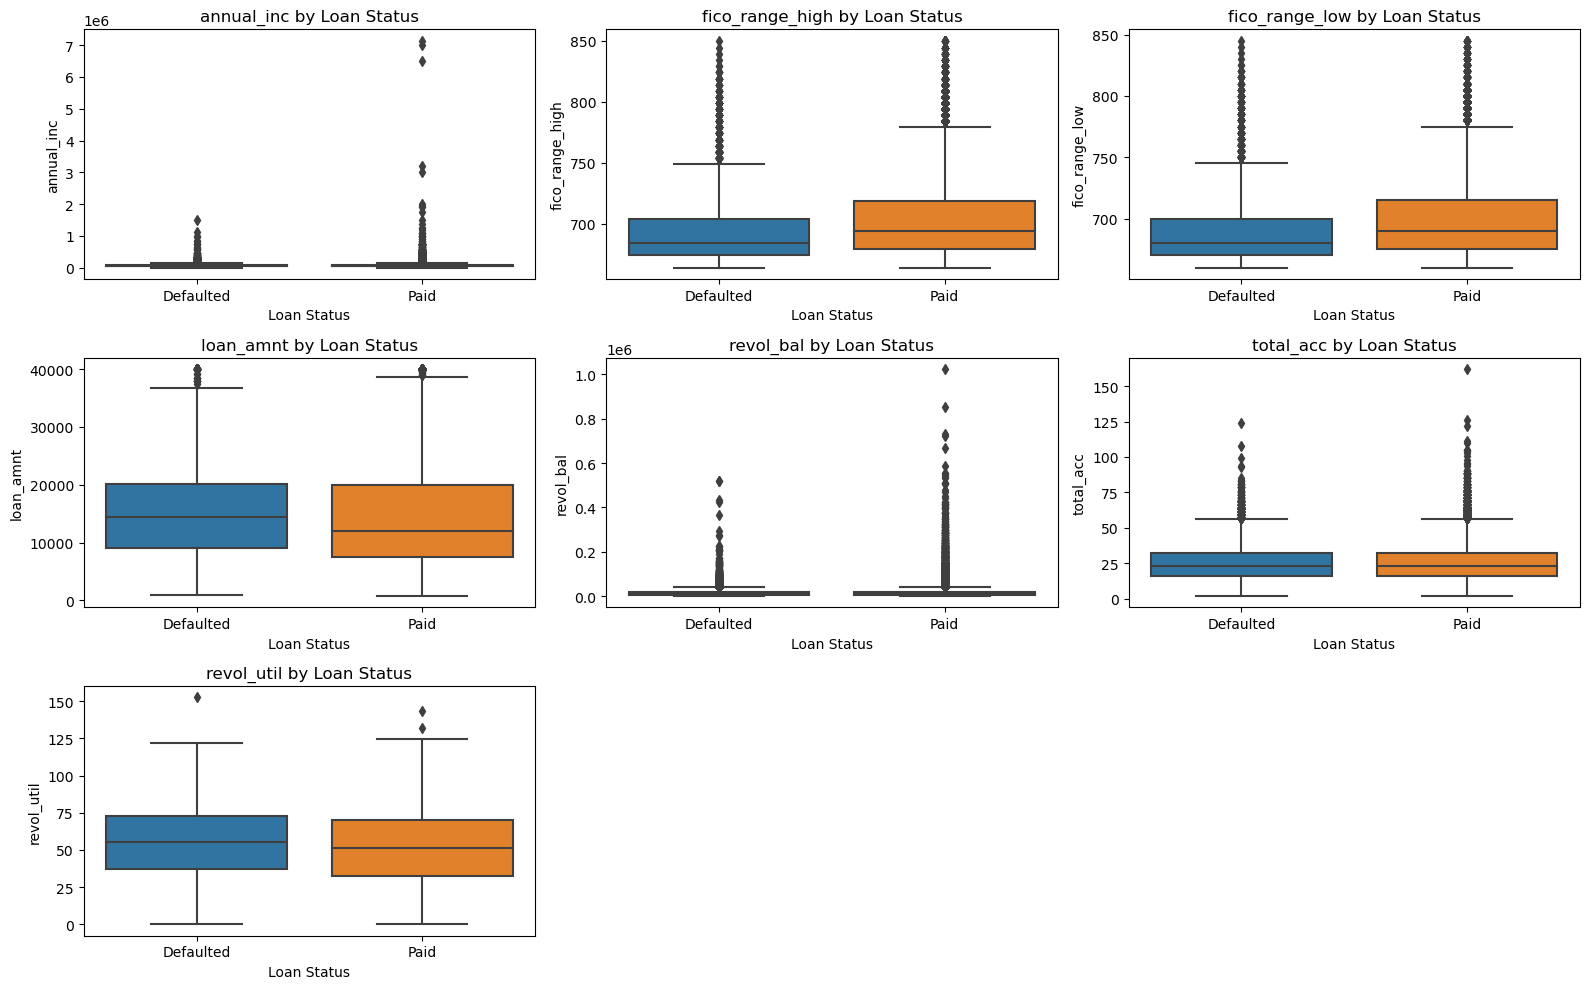

In [28]:
#Bivariate Analysis (Numerical Features)
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=feature, data=train_data)
    plt.title(f'{feature} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Handling Outlier

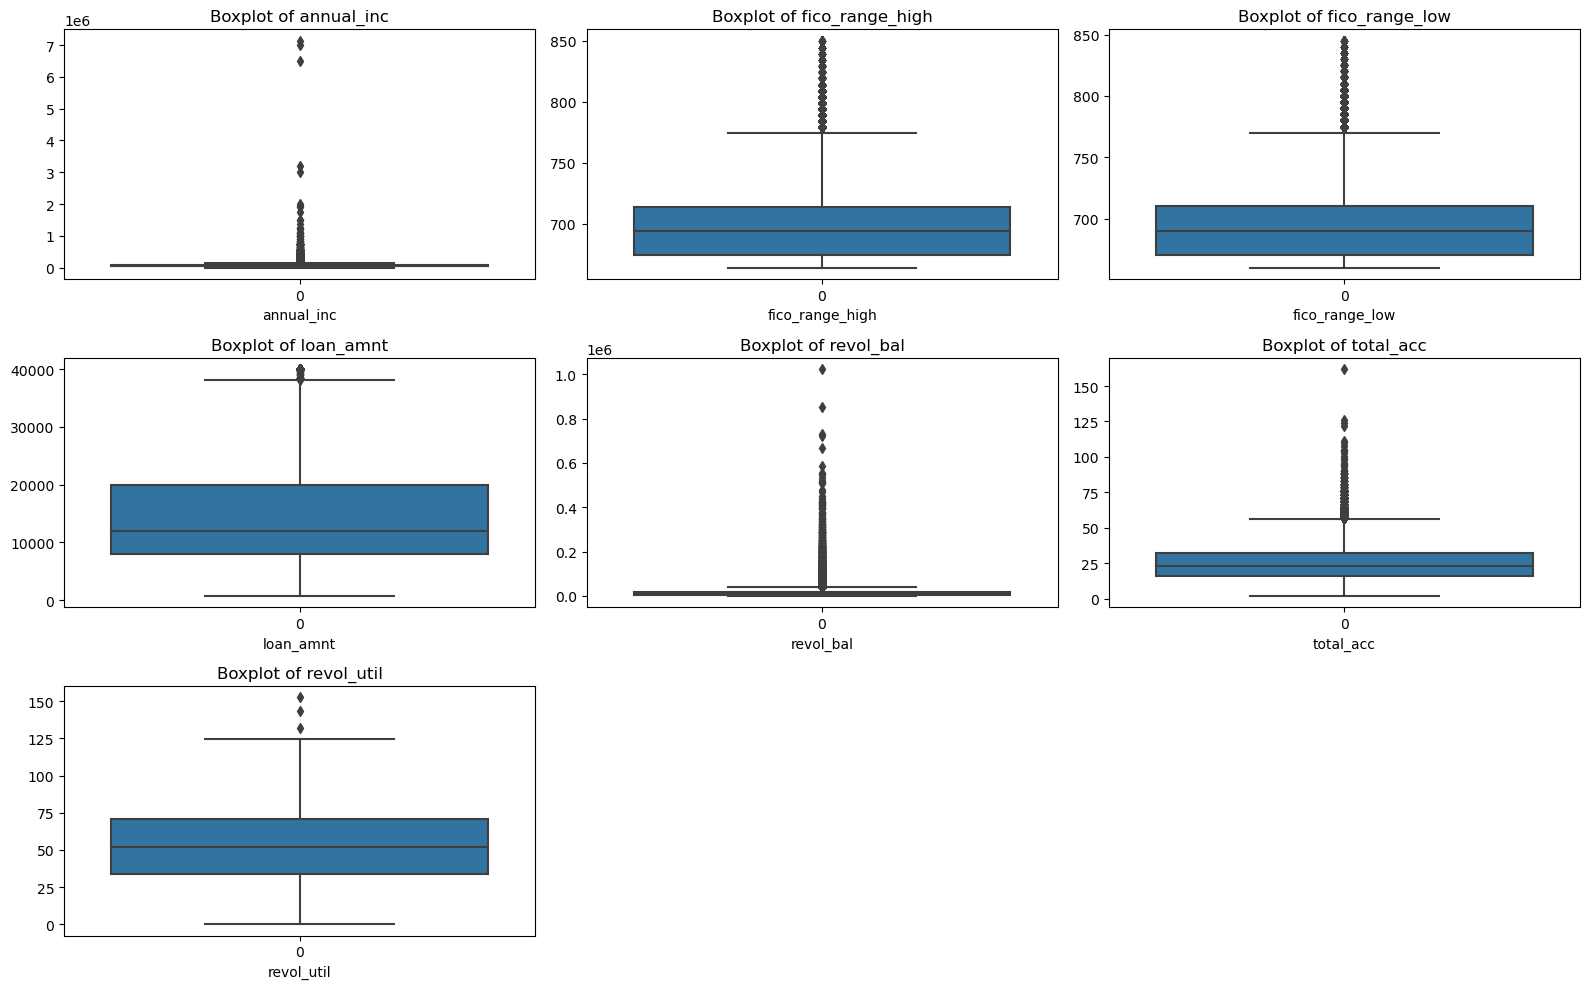

In [29]:
# Outlier Detection (Numerical Features)
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

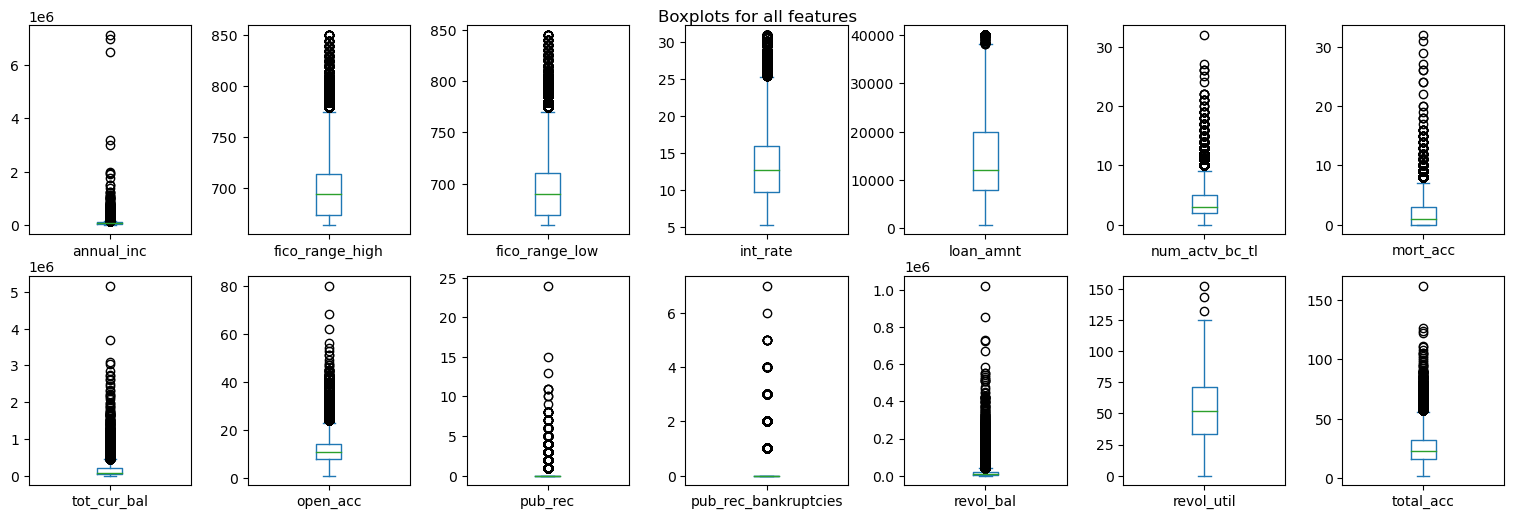

In [30]:
# Use of  boxplots or IQR (Interquartile Range) to identify potential outliers
import matplotlib.pyplot as plt

train_data.plot(kind="box", subplots=True, layout=(4,7), figsize=(15,10))
plt.suptitle("Boxplots for all features")
plt.tight_layout(pad=0.2)
plt.show()

In [31]:
# Select the numerical columns
numerical_columns = train_data.select_dtypes(include=['int','float64']).columns
# Print the list of categorical columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')


In [32]:
numerical_cols = ['fico_range_high', 'fico_range_low', 'emp_length', 'num_actv_bc_tl', 'mort_acc', 
                  'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 
                  'total_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'revol_util']

array([[<Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'fico_range_low'}>,
        <Axes: title={'center': 'num_actv_bc_tl'}>,
        <Axes: title={'center': 'mort_acc'}>],
       [<Axes: title={'center': 'tot_cur_bal'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>],
       [<Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'int_rate'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'revol_util'}>, <Axes: >, <Axes: >]],
      dtype=object)

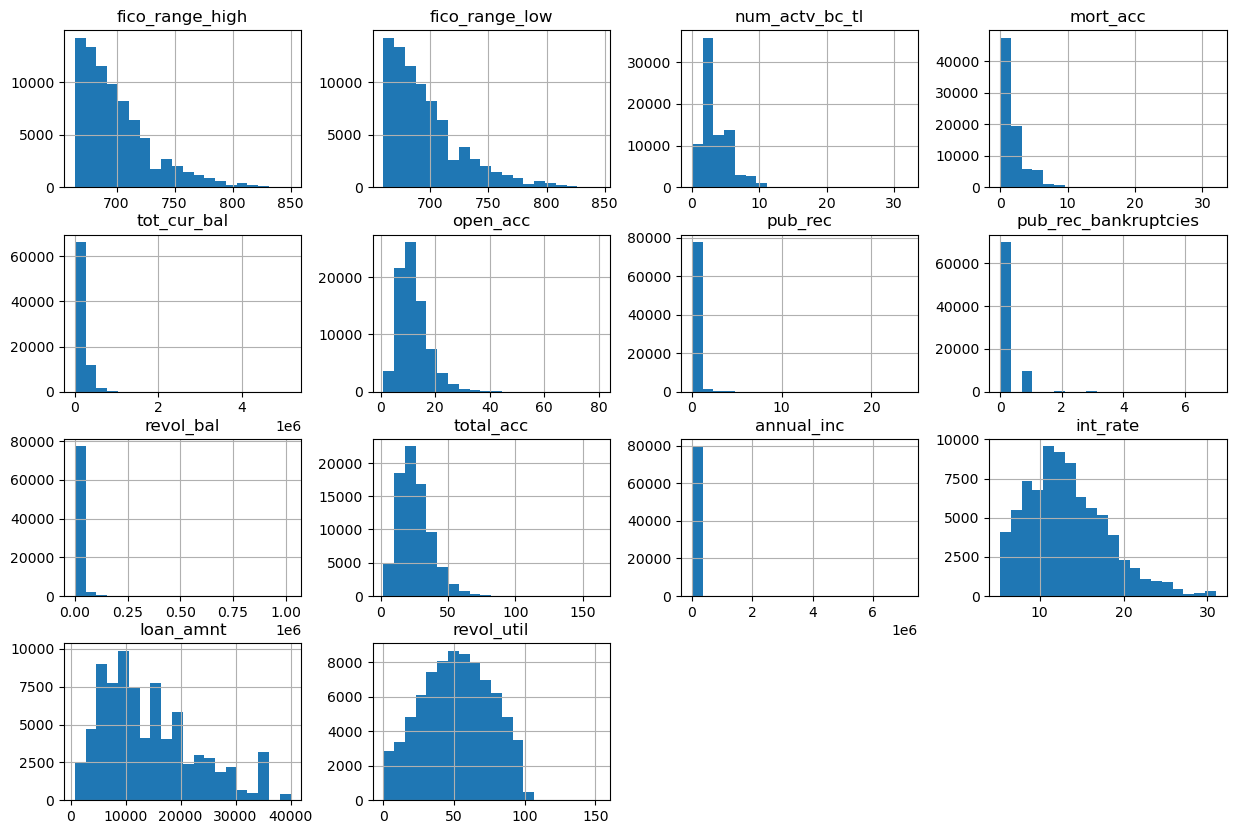

In [33]:
#Visual Inspection of numerical columns
train_data[numerical_cols].hist(bins=20, figsize=(15, 10))

# Handling the outliers

In [34]:
import re

# Preprocess 'emp_length' column
train_data['emp_length'] = train_data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0] if pd.notnull(x) else x)
train_data['emp_length'] = train_data['emp_length'].astype(float)

# Calculate Z-scores
z_scores = np.abs((train_data[numerical_cols] - train_data[numerical_cols].mean()) / train_data[numerical_cols].std())

# Find outliers based on Z-scores
outliers_z_score = z_scores > 3

# Count outliers
print("Z-score outliers:")
print(outliers_z_score.sum())


Z-score outliers:
fico_range_high         1170
fico_range_low          1170
emp_length                 0
num_actv_bc_tl           969
mort_acc                1057
tot_cur_bal             1150
open_acc                 911
pub_rec                 2234
pub_rec_bankruptcies     643
revol_bal               1017
total_acc                756
annual_inc               586
int_rate                 588
loan_amnt                  0
revol_util                 3
dtype: int64


In [35]:
# Calculate the 95th percentile value for each numerical column
percentile_95 = train_data[numerical_cols].quantile(0.95)

# Replace outliers with the 95th percentile value
for col in numerical_cols:
    upper_limit = percentile_95[col]
    train_data[col] = np.where(train_data[col] > upper_limit, upper_limit, train_data[col])

In [36]:
#  Z-score
z_scores = np.abs((train_data[numerical_cols] - train_data[numerical_cols].mean()) / train_data[numerical_cols].std())
outliers_z_score = z_scores > 3  # Using 3 as the threshold for outlier detection
print("Z-score outliers:")
print(outliers_z_score.sum())

Z-score outliers:
fico_range_high         0
fico_range_low          0
emp_length              0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
total_acc               0
annual_inc              0
int_rate                0
loan_amnt               0
revol_util              0
dtype: int64


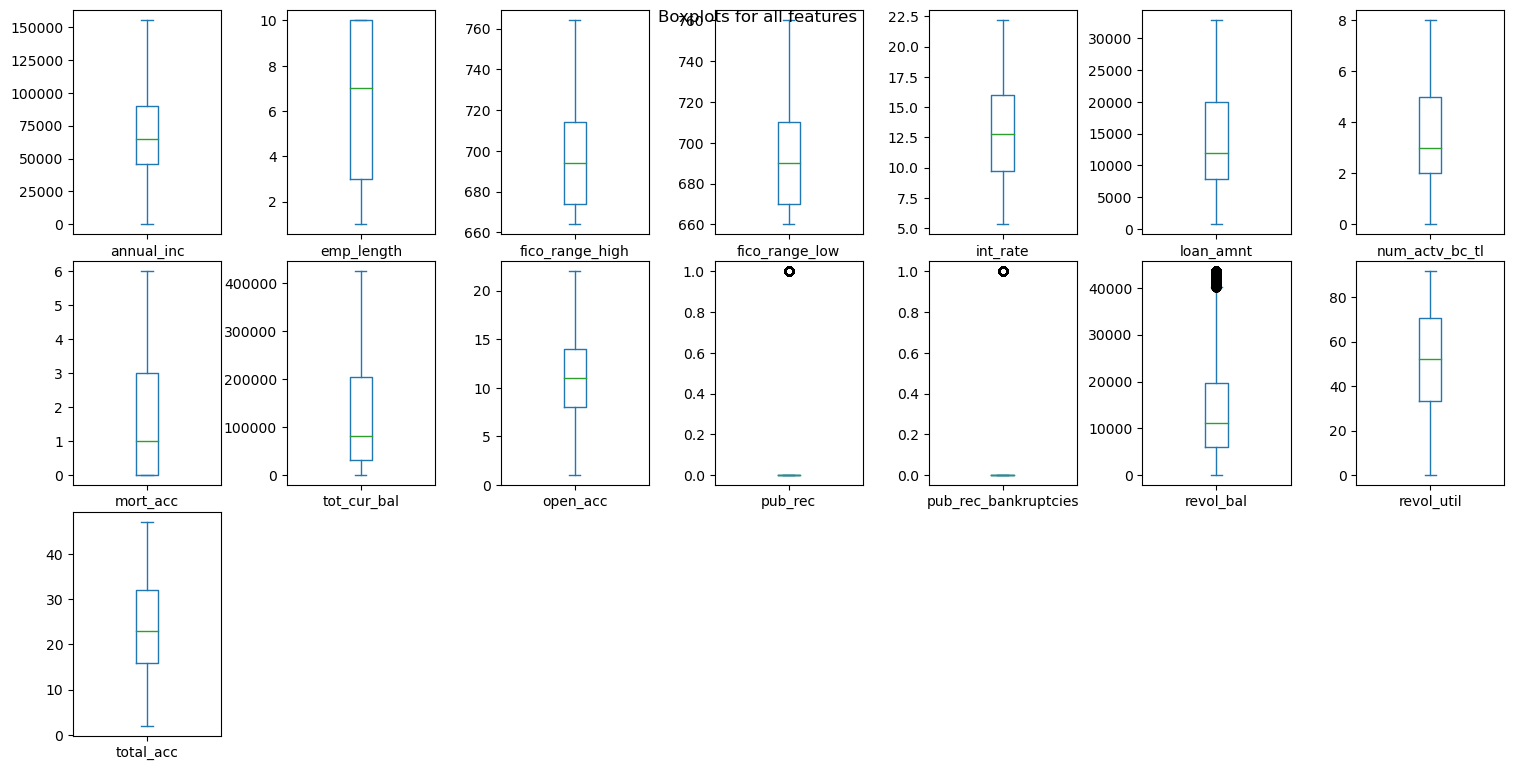

In [37]:
# Use of  boxplots or IQR (Interquartile Range) to identify potential outliers
import matplotlib.pyplot as plt

train_data.plot(kind="box", subplots=True, layout=(4,7), figsize=(15,10))
plt.suptitle("Boxplots for all features")
plt.tight_layout(pad=0.2)
plt.show()

# Feature Engeneering

# Create new feature columns

In [38]:
# Creating a new column for the loan amount divided by the annual income
train_data['loan_amnt_by_annual_inc'] = train_data['loan_amnt'] / train_data['annual_inc']

In [39]:
#tot_cur_bal_by_annual_inc
"""  This feature represents the ratio of the loan amount (loan_amnt) to the borrower's self-reported annual income (annual_inc). 
It provides insight into the borrower's debt-to-income ratio, which is a crucial factor in assessing their ability to manage
and repay the loan. A higher ratio indicates that the borrower is taking on a larger loan relative to their income,
which may increase the risk of default if the borrower's income is insufficient to cover loan repayments."""

train_data['tot_cur_bal_by_annual_inc'] = train_data['tot_cur_bal'] / train_data['annual_inc']

In [40]:
# Credit History Length
"""The length of the borrower's credit history, calculated as the difference between the current year and the year the earliest
credit line was opened. A longer credit history may indicate more stability and reliability in repaying loans."""


train_data['credit_history_length'] = 2024 - train_data['earliest_cr_line'].str.split('-').str[1].astype(int)

In [41]:
# Credit Utilization Ratio
""" The ratio of the borrower's revolving line utilization (revol_util) to their total credit revolving balance (revol_bal).
High credit utilization may indicate financial strain and a higher likelihood of default."""


train_data['credit_utilization_ratio'] = train_data['revol_util'] / train_data['revol_bal']

In [42]:
# Income-to-Loan Amount Ratio
""" The ratio of the borrower's self-reported annual income (annual_inc) to the listed amount of the loan applied for (loan_amnt).
A higher income-to-loan amount ratio suggests the borrower has a higher capacity to repay the loan."""


train_data['income_loan_ratio'] = train_data['annual_inc'] / train_data['loan_amnt']

In [43]:
# Employment Stability
"""Categorize employment length (emp_length) into "stable" (emp_length >= 5 years) and "unstable" (emp_length < 5 years)
categories. Stable employment may indicate a lower risk of default."""

train_data['employment_stability'] = np.where(train_data['emp_length'] >= 5, 'stable', 'unstable')

In [44]:
print(train_data[['credit_history_length', 'credit_utilization_ratio', 'income_loan_ratio', 'employment_stability','loan_amnt_by_annual_inc' , 
                 'tot_cur_bal_by_annual_inc']])

       credit_history_length  credit_utilization_ratio  income_loan_ratio  \
0                       1927                  0.017160           4.702628   
1                       1937                  0.003023           4.545455   
2                       2017                  0.003815           3.333333   
3                       1944                  0.003745           5.037100   
4                       1925                  0.002619           2.438931   
...                      ...                       ...                ...   
79995                   2024                  0.004534           3.133462   
79996                   1929                  0.009260           6.451613   
79997                   2019                  0.006547          12.857143   
79998                   1932                  0.004152           5.222222   
79999                   1925                  0.002103           7.750000   

      employment_stability  loan_amnt_by_annual_inc  tot_cur_bal_by_annual_

# Transformation from categorical to numerica columns by one hot encoding

In [45]:
# Assuming train_data is your DataFrame containing the loan_status column
# Map 'paid' to 1 and 'defaulter' to 0 in the loan_status column
train_data['loan_status'] = train_data['loan_status'].replace({'Paid': 1, 'Defaulted': 0})
train_data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,title,total_acc,verification_status,loan_status,loan_amnt_by_annual_inc,tot_cur_bal_by_annual_inc,credit_history_length,credit_utilization_ratio,income_loan_ratio,employment_stability
0,CO,85000.0,Jul-97,10.0,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,Debt consolidation,8.0,Source Verified,0,0.212647,3.758576,1927,0.017160,4.702628,stable
1,CA,40000.0,Apr-87,10.0,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,Credit Loan,12.0,Verified,1,0.220000,0.498600,1937,0.003023,4.545455,stable
2,FL,60000.0,Aug-07,10.0,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,Debt consolidation,16.0,Source Verified,1,0.300000,0.386650,2017,0.003815,3.333333,stable
3,IL,100742.0,Sep-80,10.0,printer,664.0,660.0,B,MORTGAGE,Individual,...,Debt consolidation,19.0,Source Verified,1,0.198527,0.721159,1944,0.003745,5.037100,stable
4,MD,80000.0,Jul-99,10.0,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,Debt Connsolidation,47.0,Verified,1,0.410016,0.807887,1925,0.002619,2.438931,stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10.0,Sports Group Manager,664.0,660.0,G,MORTGAGE,Individual,...,Debt consolidation,42.0,Verified,0,0.319136,2.722481,2024,0.004534,3.133462,stable
79996,NH,45000.0,Aug-95,10.0,Web Designer,684.0,680.0,C,MORTGAGE,Individual,...,Debt consolidation,14.0,Not Verified,1,0.155000,5.461800,1929,0.009260,6.451613,stable
79997,NY,90000.0,Apr-05,1.0,Program Officer,724.0,720.0,B,OWN,Individual,...,Debt consolidation,26.0,Source Verified,1,0.077778,4.247489,2019,0.006547,12.857143,unstable
79998,TX,94000.0,Apr-92,3.0,Sr. Business Analyst,669.0,665.0,D,MORTGAGE,Individual,...,Credit card refinancing,47.0,Source Verified,1,0.191489,2.147245,1932,0.004152,5.222222,unstable


In [46]:
# Analyze the categorical data
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_cols)
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(col + ": ", len(train_data[col].unique()))


Categorical Columns:
Index(['addr_state', 'earliest_cr_line', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status',
       'employment_stability'],
      dtype='object')

Unique Values in Categorical Columns:
addr_state:  51
earliest_cr_line:  640
emp_title:  36662
grade:  7
home_ownership:  6
application_type:  2
initial_list_status:  2
purpose:  14
sub_grade:  35
term:  2
title:  5349
verification_status:  3
employment_stability:  2


In [47]:
# Drop rows with null values
train_data.dropna(inplace=True)
# Check for rows containing positive or negative infinity values in specific columns
inf_rows = train_data.isin([np.inf, -np.inf]).any(axis=1)

# Drop rows with positive or negative infinity values
train_data = train_data[~inf_rows]

In [48]:
#print(train_data.isnull().sum())  # Check for NaN values
print(train_data.isin([np.inf, -np.inf]).sum())

addr_state                   0
annual_inc                   0
earliest_cr_line             0
emp_length                   0
emp_title                    0
fico_range_high              0
fico_range_low               0
grade                        0
home_ownership               0
application_type             0
initial_list_status          0
int_rate                     0
loan_amnt                    0
num_actv_bc_tl               0
mort_acc                     0
tot_cur_bal                  0
open_acc                     0
pub_rec                      0
pub_rec_bankruptcies         0
purpose                      0
revol_bal                    0
revol_util                   0
sub_grade                    0
term                         0
title                        0
total_acc                    0
verification_status          0
loan_status                  0
loan_amnt_by_annual_inc      0
tot_cur_bal_by_annual_inc    0
credit_history_length        0
credit_utilization_ratio     0
income_l

In [49]:
# Remove 'title' and 'emp_title' columns from the DataFrame
train_data.drop(columns=['title', 'emp_title'], inplace=True)

C:\Users\mrk_lenovo_pc\AppData\Local\Temp\ipykernel_48856\3751300847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['title', 'emp_title'], inplace=True)


In [50]:
# Select categorical columns for one-hot encoding
one_hot_cols = ['addr_state', 'earliest_cr_line', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term',  'verification_status',
       'employment_stability']

In [51]:
# Perform one-hot encoding for selected columns
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(train_data[one_hot_cols]))
one_hot_encoded.columns = one_hot_encoder.get_feature_names_out(one_hot_cols)

In [52]:
# Check the shape of the DataFrame before dropping and concatenating
print("Shape of train_data before dropping and concatenating:", train_data.shape)

Shape of train_data before dropping and concatenating: (79593, 32)


In [53]:
# Drop original categorical columns from the dataset
train_data = train_data.drop(columns=one_hot_cols , axis =1)
# Check the DataFrame after dropping the columns
print("Shape of train_data after dropping columns:", train_data.shape)


Shape of train_data after dropping columns: (79593, 21)


In [54]:
# Concatenate one-hot encoded columns with the dataset
train_data = pd.concat([train_data, one_hot_encoded], axis=1)
train_data.dtypes.value_counts()
# Inspect NaN values in the loan_status column
print("NaN values in loan_status column:", train_data['loan_status'].isna().sum())


NaN values in loan_status column: 407


In [55]:
# Display the DataFrame to inspect the data
print(train_data['loan_status'])

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
78885    NaN
78979    NaN
79057    NaN
79162    NaN
79315    NaN
Name: loan_status, Length: 80000, dtype: float64


In [56]:
# Remove rows with NaN values in the loan_status column
train_data.dropna(subset=['loan_status'], inplace=True)
print(train_data['loan_status'])

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
79995    0.0
79996    1.0
79997    1.0
79998    1.0
79999    1.0
Name: loan_status, Length: 79593, dtype: float64


In [57]:
nan_values = train_data[train_data['loan_status'].isna()]
print(nan_values)

Empty DataFrame
Columns: [annual_inc, emp_length, fico_range_high, fico_range_low, int_rate, loan_amnt, num_actv_bc_tl, mort_acc, tot_cur_bal, open_acc, pub_rec, pub_rec_bankruptcies, revol_bal, revol_util, total_acc, loan_status, loan_amnt_by_annual_inc, tot_cur_bal_by_annual_inc, credit_history_length, credit_utilization_ratio, income_loan_ratio, addr_state_AL, addr_state_AR, addr_state_AZ, addr_state_CA, addr_state_CO, addr_state_CT, addr_state_DC, addr_state_DE, addr_state_FL, addr_state_GA, addr_state_HI, addr_state_IA, addr_state_ID, addr_state_IL, addr_state_IN, addr_state_KS, addr_state_KY, addr_state_LA, addr_state_MA, addr_state_MD, addr_state_ME, addr_state_MI, addr_state_MN, addr_state_MO, addr_state_MS, addr_state_MT, addr_state_NC, addr_state_ND, addr_state_NE, addr_state_NH, addr_state_NJ, addr_state_NM, addr_state_NV, addr_state_NY, addr_state_OH, addr_state_OK, addr_state_OR, addr_state_PA, addr_state_RI, addr_state_SC, addr_state_SD, addr_state_TN, addr_state_TX, addr

In [58]:
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data
train_data_imputed = imputer.fit_transform(train_data)

# Convert the result back to a DataFrame
train_data_imputed = pd.DataFrame(train_data_imputed, columns=train_data.columns)

In [59]:
train_data_imputed['loan_status']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
79588    0.0
79589    1.0
79590    1.0
79591    1.0
79592    1.0
Name: loan_status, Length: 79593, dtype: float64

# Train Test Split

In [60]:
# Split the data into train and test set
X = train_data_imputed.drop(["loan_status"], axis=1)
y = train_data_imputed["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Print shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (63674, 770)
Shape of X_test: (15919, 770)
Shape of y_train: (63674,)
Shape of y_test: (15919,)


In [62]:
X_train

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,...,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 60 months,verification_status_Source Verified,verification_status_Verified,employment_stability_unstable
43233,123500.0,2.0,764.0,760.0,17.99,30000.0,2.0,5.0,219756.0,17.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
578,42000.0,8.0,709.0,705.0,17.10,18550.0,4.0,3.0,54494.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30610,34000.0,4.0,679.0,675.0,10.75,7300.0,4.0,6.0,10336.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71272,55000.0,10.0,679.0,675.0,17.10,10000.0,4.0,6.0,249021.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58459,40000.0,10.0,694.0,690.0,17.27,4000.0,3.0,2.0,50495.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,50000.0,1.0,689.0,685.0,17.27,21725.0,7.0,2.0,168851.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,46000.0,10.0,704.0,700.0,12.74,6000.0,6.0,2.0,112494.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
76820,39000.0,2.0,679.0,675.0,13.99,17000.0,2.0,1.0,150542.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,52000.0,1.0,684.0,680.0,19.24,7475.0,2.0,0.0,33368.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [63]:
y_train

43233    0.0
578      1.0
30610    1.0
71272    1.0
58459    1.0
        ... 
6265     0.0
54886    1.0
76820    0.0
860      0.0
15795    0.0
Name: loan_status, Length: 63674, dtype: float64

In [64]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.34694769,  1.03911795,  0.5452246 , ..., -0.78773945,
         1.49746025,  1.29414691],
       [-0.7360464 , -1.19783238, -0.1624801 , ..., -0.78773945,
         1.49746025, -0.7727098 ],
       [ 0.74829314, -1.47745117,  0.5452246 , ..., -0.78773945,
        -0.66779736, -0.7727098 ],
       ...,
       [ 2.39115438,  0.75949916, -0.1624801 , ...,  1.26945527,
        -0.66779736,  1.29414691],
       [ 1.15180292,  1.03911795, -0.51633245, ..., -0.78773945,
        -0.66779736,  1.29414691],
       [-0.69281321,  1.03911795, -1.04711098, ..., -0.78773945,
        -0.66779736, -0.7727098 ]])

In [65]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
X_test_selected

C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [295 408 457 509 512 565 672] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([[-0.34694769,  0.5452246 ,  0.5452246 , ..., -0.00272224,
        -0.4057562 ,  0.01643769],
       [-0.7360464 , -0.1624801 , -0.1624801 , ...,  0.89211817,
         0.64132058, -0.58206656],
       [ 0.74829314,  0.5452246 ,  0.5452246 , ..., -0.01526673,
        -0.1768627 , -0.22559826],
       ...,
       [ 2.39115438, -0.1624801 , -0.1624801 , ...,  0.68304331,
        -0.19273412, -0.21259165],
       [ 1.15180292, -0.51633245, -0.51633245, ...,  0.13526717,
        -0.57796113,  0.3285962 ],
       [-0.69281321, -1.04711098, -1.04711098, ..., -0.45432393,
        -0.5935594 ,  0.36659811]])

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)

Logistic Regression:
Accuracy: 0.8011181606884854
Precision: 0.8032486411326002
Recall: 0.9958470459175678
F1-score: 0.8892387349566191


C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
#Cross Validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X, y, cv=5, scoring='f1')
print("Logistic Regression Cross-Validation F1-score:", scores.mean())

C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression Cross-Validation F1-score: 0.8885791605487089


C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model using performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Random Forest:
Accuracy: 0.8019976129153842
Precision: 0.8031545741324921
Recall: 0.9974925560257013
F1-score: 0.889836432266182


In [69]:
scores = cross_val_score(random_forest, X, y, cv=5, scoring='f1')
print("Random Forest Cross-Validation F1-score:", scores.mean())

Random Forest Cross-Validation F1-score: 0.888930845589417


# K-Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)

K-Nearest Neighbors:
Accuracy: 0.7703373327470319
Precision: 0.8069300256168263
Recall: 0.9379407616361072
F1-score: 0.8675170314538339


In [71]:
scores = cross_val_score(knn, X, y, cv=5, scoring='f1')
print("KNN Cross-Validation F1-score:", scores.mean())

KNN Cross-Validation F1-score: 0.8664636028391183


# AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_pred_ab = ada_boost.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)
print("AdaBoost:")
print("Accuracy:", accuracy_ab)
print("Precision:", precision_ab)
print("Recall:", recall_ab)
print("F1-score:", f1_ab)

C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
Accuracy: 0.8024373390288335
Precision: 0.806371455877668
Recall: 0.9916940918351356
F1-score: 0.8894823769195629


In [73]:
scores = cross_val_score(ada_boost, X, y, cv=5, scoring='f1')
print("AdaBoost Cross-Validation F1-score:", scores.mean())

C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mrk_lenovo_pc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

AdaBoost Cross-Validation F1-score: 0.8883775709381382


# Gradient Boosting

In [74]:
from sklearn.ensemble import  GradientBoostingClassifier
grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)
y_pred_gb = grad_boost.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print("Gradient Boosting:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)

Gradient Boosting:
Accuracy: 0.803128337207111
Precision: 0.8052631578947368
Recall: 0.9950634696755994
F1-score: 0.8901584186176924


In [75]:
scores = cross_val_score(grad_boost, X, y, cv=5, scoring='f1')
print("Gradient Boosting Cross-Validation F1-score:", scores.mean())

Gradient Boosting Cross-Validation F1-score: 0.8889386205997338


# XGBoost

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print("XGBoost:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

XGBoost:
Accuracy: 0.7975375337646837
Precision: 0.8084858676670332
Recall: 0.9794703024604294
F1-score: 0.8858023597774864


In [77]:
scores = cross_val_score(xgb, X, y, cv=5, scoring='f1')
print("XGBoost Cross-Validation F1-score:", scores.mean())

XGBoost Cross-Validation F1-score: 0.8853571285751979


# BaggingClassifier

In [78]:
from sklearn.ensemble import BaggingClassifier
# Initialize and train Bagging classifier
bagging_classifier = BaggingClassifier( n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model using performance metrics
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)

print("Bagging:")
print("Accuracy:", accuracy_bagging)
print("Precision:", precision_bagging)
print("Recall:", recall_bagging)
print("F1-score:", f1_bagging)

Bagging:
Accuracy: 0.7773729505622212
Precision: 0.8149084449303088
Recall: 0.9345713837956433
F1-score: 0.870647492517702


In [79]:
scores = cross_val_score(bagging_classifier, X, y, cv=5, scoring='f1')
print("Bagging Classifier Cross-Validation F1-score:", scores.mean())

Bagging Classifier Cross-Validation F1-score: 0.8713522330372154


In [80]:
"""Gradient Boosting is selected for hyperparameter tuning due to its strong performance, 
flexibility across different data types, robustness against overfitting, ability to assess feature importance, 
and scalability with efficient implementations like XGBoost and LightGBM."""

'Gradient Boosting is selected for hyperparameter tuning due to its strong performance, \nflexibility across different data types, robustness against overfitting, ability to assess feature importance, \nand scalability with efficient implementations like XGBoost and LightGBM.'

In [81]:
# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Initialize Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)

In [ ]:
# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Tuned Gradient Boosting:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)